In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/Recyclables Classification Dataset/images/images'


Mounted at /content/drive


**important code snippets

In [2]:
"""Dataset: Recyclable and Household Waste Classification
Version: 1.0
Date: 5/18/2024

This dataset contains images of various recyclable materials, general waste, and household items for the purpose of waste classification and recycling research.

Dataset Structure:
The dataset is organized into a hierarchical folder structure as follows:

- images/
  - Plastic water bottles/
    - default/
      - image1.png
      - image2.png
      - ...
    - real_world/
      - image1.png
      - image2.png
      - ...
  - Plastic soda bottles/
    - default/
      - image1.png
      - image2.png
      - ...
    - real_world/
      - image1.png
      - image2.png
      - ...
  - Plastic detergent bottles/
    - default/
      - image1.png
      - image2.png
      - ...
    - real_world/
      - image1.png
      - image2.png
      - ...
  - ...

The "images" folder contains subfolders, each representing a specific waste category or item. The subfolder names serve as the labels for the respective categories.

Within each category subfolder, there are two folders:
1. "default": Contains standard or studio-like images of the waste item.
2. "real_world": Contains images of the waste item in real-world scenarios or environments.

All images in the dataset are in the PNG format.

Waste Categories:
The dataset covers the following waste categories and items:
- Plastic: water bottles, soda bottles, detergent bottles, shopping bags, trash bags, food containers, disposable cutlery, straws, cup lids
- Paper and Cardboard: newspaper, office paper, magazines, cardboard boxes, cardboard packaging
- Glass: beverage bottles, food jars, cosmetic containers
- Metal: aluminum soda cans, aluminum food cans, steel food cans, aerosol cans
- Organic Waste: food waste (fruit peels, vegetable scraps), eggshells, coffee grounds, tea bags
- Textiles: clothing, shoes
"""

import os, re, random, time
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import RandomErasing
from sklearn.metrics import accuracy_score, f1_score


# Define the path to the dataset
# dataset_path = r'C:\Users\Vaquita\Downloads\Recyclables Classification Dataset\images\images'

# Define transformations for training, validation, and test sets
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(p=0.4),  # Flip horizontally with 50% probability
    transforms.RandomRotation(degrees=15),  # Rotate by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet mean and std
    RandomErasing(p=0.3, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')  # Randomly erase a rectangle region with 50% probability
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=train_transforms)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Apply validation/test transformations to the validation and test sets
val_dataset.dataset.transform = val_test_transforms
test_dataset.dataset.transform = val_test_transforms

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

1. Problem Definition

---

1. Data Exploration and Visualization

1.1 Load dataset and visualize the images

In [ ]:
import os, re, random
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the dataset
# dataset_path = r'C:\Users\Vaquita\Downloads\Recyclables Classification Dataset\images\images'

# Function to load and visualize a random patch of images from a given folder
def visualize_random_images(folder_path, title, num_images=5):
    images = []
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    random_files = random.sample(file_names, min(num_images, len(file_names)))

    for file_name in random_files:
        img_path = os.path.join(folder_path, file_name)
        img = Image.open(img_path)
        images.append(img)

    # Plot the images
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    fig.suptitle(title)
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Function to traverse the dataset and visualize random images
def visualize_dataset(dataset_path, num_images=5):
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for subfolder in ['default', 'real_world']:
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    title = f"{category} - {subfolder}"
                    visualize_random_images(subfolder_path, title, num_images)

# Visualize the dataset
visualize_dataset(dataset_path)

1.2. Class Dist.

{'aerosol_cans': {'default': 250, 'real_world': 250}, 'aluminum_food_cans': {'default': 250, 'real_world': 250}, 'aluminum_soda_cans': {'default': 250, 'real_world': 250}, 'cardboard_boxes': {'default': 250, 'real_world': 250}, 'cardboard_packaging': {'default': 250, 'real_world': 250}, 'clothing': {'default': 250, 'real_world': 250}, 'coffee_grounds': {'default': 250, 'real_world': 250}, 'disposable_plastic_cutlery': {'default': 250, 'real_world': 250}, 'food_waste': {'default': 250, 'real_world': 250}, 'glass_cosmetic_containers': {'default': 250, 'real_world': 250}, 'glass_food_jars': {'default': 250, 'real_world': 249}, 'magazines': {'default': 250, 'real_world': 250}, 'newspaper': {'default': 250, 'real_world': 250}, 'office_paper': {'default': 250, 'real_world': 250}, 'paper_cups': {'default': 250, 'real_world': 250}, 'plastic_cup_lids': {'default': 250, 'real_world': 250}, 'plastic_detergent_bottles': {'default': 250, 'real_world': 250}, 'plastic_food_containers': {'default': 25

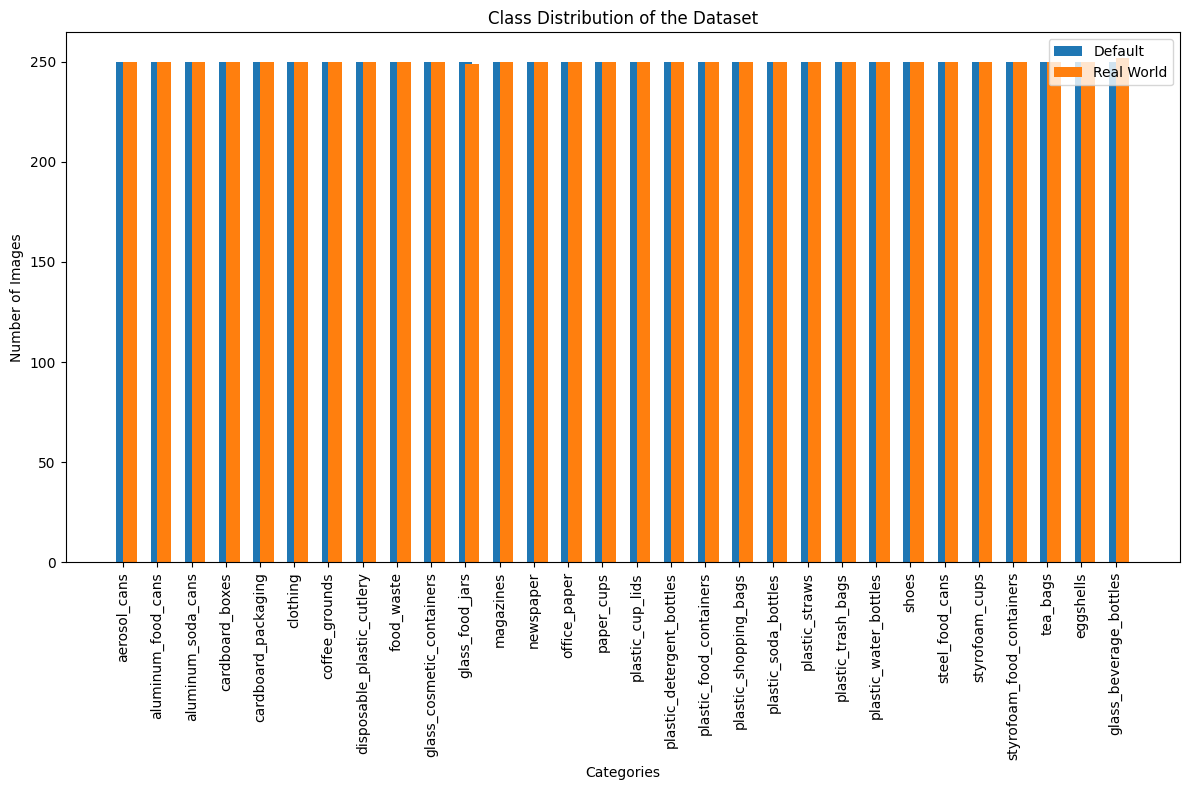

In [3]:

# Function to count images in each category and subfolder
def count_images(dataset_path):
    class_counts = {}
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            class_counts[category] = {'default': 0, 'real_world': 0}
            for subfolder in ['default', 'real_world']:
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    num_images = len([f for f in os.listdir(subfolder_path) if f.endswith('.png')])
                    class_counts[category][subfolder] = num_images
    return class_counts

# Function to visualize the class distribution
def visualize_class_distribution(class_counts):
    categories = list(class_counts.keys())
    default_counts = [class_counts[category]['default'] for category in categories]
    real_world_counts = [class_counts[category]['real_world'] for category in categories]

    x = range(len(categories))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(x, default_counts, width=0.4, label='Default', align='center')
    ax.bar(x, real_world_counts, width=0.4, label='Real World', align='edge')

    ax.set_xlabel('Categories')
    ax.set_ylabel('Number of Images')
    ax.set_title('Class Distribution of the Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Count the images in the dataset
class_counts = count_images(dataset_path)
print(class_counts)
# Visualize the class distribution
visualize_class_distribution(class_counts)

2. Aug + Data loaders

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import RandomErasing

# Define transformations for training, validation, and test sets
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Flip horizontally with 50% probability
    transforms.RandomRotation(degrees=15),  # Rotate by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet mean and std
    RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')  # Randomly erase a rectangle region with 50% probability
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=train_transforms)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Apply validation/test transformations to the validation and test sets
val_dataset.dataset.transform = val_test_transforms
test_dataset.dataset.transform = val_test_transforms

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
Attempt 3 with training time + paramters

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 58.4MB/s]

Training and evaluating ResNet34


Epoch [1/10] - Training Accuracy: 0.4732, Validation Loss: 1.9162, Validation Accuracy: 0.5213, Validation F1 Score: 0.5081
Epoch [2/10] - Training Accuracy: 0.6428, Validation Loss: 1.2544, Validation Accuracy: 0.6420, Validation F1 Score: 0.6310
Epoch [3/10] - Training Accuracy: 0.7273, Validation Loss: 1.1380, Validation Accuracy: 0.6707, Validation F1 Score: 0.6755
Epoch [4/10] - Training Accuracy: 0.7911, Validation Loss: 1.0018, Validation Accuracy: 0.7353, Validation F1 Score: 0.7294
Epoch [5/10] - Training Accuracy: 0.8199, Validation Loss: 0.9266, Validation Accuracy: 0.7427, Validation F1 Score: 0.7462
Epoch [6/10] - Training Accuracy: 0.8586, Validation Loss: 0.9073, Validation Accuracy: 0.7487, Validation F1 Score: 0.7425
Epoch [7/10] - Training Accuracy: 0.8686, Validation Loss: 0.9489, Validation Accuracy: 0.7483, Validation F1 Score: 0.7469
Epoch [8/10] - Training Accuracy: 0.9003, Validation Loss: 0.9128, Validation Accuracy: 0.7693, Validation F1 Score: 0.7690
Epoch [9

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 68.5MB/s]


Training and evaluating ResNeXt50
Epoch [1/10] - Training Accuracy: 0.4903, Validation Loss: 1.4756, Validation Accuracy: 0.5723, Validation F1 Score: 0.5630
Epoch [2/10] - Training Accuracy: 0.6476, Validation Loss: 1.1380, Validation Accuracy: 0.6693, Validation F1 Score: 0.6580
Epoch [3/10] - Training Accuracy: 0.7197, Validation Loss: 0.9178, Validation Accuracy: 0.7227, Validation F1 Score: 0.7123
Epoch [4/10] - Training Accuracy: 0.7758, Validation Loss: 0.8706, Validation Accuracy: 0.7617, Validation F1 Score: 0.7633
Epoch [5/10] - Training Accuracy: 0.7921, Validation Loss: 0.9326, Validation Accuracy: 0.7223, Validation F1 Score: 0.7093
Epoch [6/10] - Training Accuracy: 0.8272, Validation Loss: 0.9804, Validation Accuracy: 0.7153, Validation F1 Score: 0.7197
Epoch [7/10] - Training Accuracy: 0.8516, Validation Loss: 0.8156, Validation Accuracy: 0.7683, Validation F1 Score: 0.7684
Epoch [8/10] - Training Accuracy: 0.8712, Validation Loss: 0.9293, Validation Accuracy: 0.7613, Va

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 69.0MB/s]


Training and evaluating EfficientNetV2_s
Epoch [1/10] - Training Accuracy: 0.6383, Validation Loss: 0.8204, Validation Accuracy: 0.7530, Validation F1 Score: 0.7506
Epoch [2/10] - Training Accuracy: 0.7804, Validation Loss: 0.7219, Validation Accuracy: 0.7747, Validation F1 Score: 0.7767
Epoch [3/10] - Training Accuracy: 0.8313, Validation Loss: 0.6256, Validation Accuracy: 0.8037, Validation F1 Score: 0.8023
Epoch [4/10] - Training Accuracy: 0.8524, Validation Loss: 0.7700, Validation Accuracy: 0.7787, Validation F1 Score: 0.7753
Epoch [5/10] - Training Accuracy: 0.8748, Validation Loss: 0.6050, Validation Accuracy: 0.8203, Validation F1 Score: 0.8191
Epoch [6/10] - Training Accuracy: 0.8832, Validation Loss: 0.5656, Validation Accuracy: 0.8250, Validation F1 Score: 0.8257
Epoch [7/10] - Training Accuracy: 0.8972, Validation Loss: 0.6993, Validation Accuracy: 0.8083, Validation F1 Score: 0.8033
Epoch [8/10] - Training Accuracy: 0.9095, Validation Loss: 0.6136, Validation Accuracy: 0.8

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:00<00:00, 186MB/s] 


Training and evaluating ConvNeXt_tiny
Epoch [1/10] - Training Accuracy: 0.6594, Validation Loss: 0.8081, Validation Accuracy: 0.7553, Validation F1 Score: 0.7484
Epoch [2/10] - Training Accuracy: 0.7933, Validation Loss: 0.7953, Validation Accuracy: 0.7543, Validation F1 Score: 0.7410
Epoch [3/10] - Training Accuracy: 0.8339, Validation Loss: 0.7298, Validation Accuracy: 0.7800, Validation F1 Score: 0.7734
Epoch [4/10] - Training Accuracy: 0.8576, Validation Loss: 0.8418, Validation Accuracy: 0.7637, Validation F1 Score: 0.7560
Epoch [5/10] - Training Accuracy: 0.8791, Validation Loss: 0.7208, Validation Accuracy: 0.7897, Validation F1 Score: 0.7879
Epoch [6/10] - Training Accuracy: 0.8893, Validation Loss: 0.7555, Validation Accuracy: 0.8020, Validation F1 Score: 0.7970
Epoch [7/10] - Training Accuracy: 0.9061, Validation Loss: 0.7823, Validation Accuracy: 0.8057, Validation F1 Score: 0.8023
Epoch [8/10] - Training Accuracy: 0.9047, Validation Loss: 0.7053, Validation Accuracy: 0.8167

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:01<00:00, 143MB/s]


Training and evaluating EfficientNetV2_m
Epoch [1/10] - Training Accuracy: 0.6045, Validation Loss: 0.9816, Validation Accuracy: 0.6830, Validation F1 Score: 0.6703
Epoch [2/10] - Training Accuracy: 0.7602, Validation Loss: 0.7620, Validation Accuracy: 0.7590, Validation F1 Score: 0.7573
Epoch [3/10] - Training Accuracy: 0.7999, Validation Loss: 1.2442, Validation Accuracy: 0.6263, Validation F1 Score: 0.6413
Epoch [4/10] - Training Accuracy: 0.8322, Validation Loss: 0.7554, Validation Accuracy: 0.7753, Validation F1 Score: 0.7690
Epoch [5/10] - Training Accuracy: 0.8610, Validation Loss: 0.7164, Validation Accuracy: 0.7827, Validation F1 Score: 0.7795
Epoch [6/10] - Training Accuracy: 0.8685, Validation Loss: 0.6880, Validation Accuracy: 0.8047, Validation F1 Score: 0.8036
Epoch [7/10] - Training Accuracy: 0.8786, Validation Loss: 0.6518, Validation Accuracy: 0.8183, Validation F1 Score: 0.8144
Epoch [8/10] - Training Accuracy: 0.9009, Validation Loss: 0.7387, Validation Accuracy: 0.7

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 120MB/s]


Training and evaluating EfficientNet_b3
Epoch [1/10] - Training Accuracy: 0.7037, Validation Loss: 0.5807, Validation Accuracy: 0.8243, Validation F1 Score: 0.8184
Epoch [2/10] - Training Accuracy: 0.8325, Validation Loss: 0.5464, Validation Accuracy: 0.8327, Validation F1 Score: 0.8303
Epoch [3/10] - Training Accuracy: 0.8756, Validation Loss: 0.5890, Validation Accuracy: 0.8227, Validation F1 Score: 0.8132
Epoch [4/10] - Training Accuracy: 0.8900, Validation Loss: 0.5860, Validation Accuracy: 0.8323, Validation F1 Score: 0.8270
Epoch [5/10] - Training Accuracy: 0.9095, Validation Loss: 0.5638, Validation Accuracy: 0.8400, Validation F1 Score: 0.8368
Epoch [6/10] - Training Accuracy: 0.9159, Validation Loss: 0.5775, Validation Accuracy: 0.8537, Validation F1 Score: 0.8521
Epoch [7/10] - Training Accuracy: 0.9187, Validation Loss: 0.5637, Validation Accuracy: 0.8427, Validation F1 Score: 0.8400
Epoch [8/10] - Training Accuracy: 0.9247, Validation Loss: 0.5963, Validation Accuracy: 0.85

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B5_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B5_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b5_lukemelas-1a07897c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b5_lukemelas-1a07897c.pth
100%|██████████| 117M/117M [00:01<00:00, 67.1MB/s]


Training and evaluating EfficientNet_b5
Epoch [1/10] - Training Accuracy: 0.6528, Validation Loss: 1.0929, Validation Accuracy: 0.7110, Validation F1 Score: 0.7058
Epoch [2/10] - Training Accuracy: 0.8035, Validation Loss: 0.8660, Validation Accuracy: 0.7570, Validation F1 Score: 0.7624
Epoch [3/10] - Training Accuracy: 0.8445, Validation Loss: 0.7469, Validation Accuracy: 0.7863, Validation F1 Score: 0.7843
Epoch [4/10] - Training Accuracy: 0.8740, Validation Loss: 0.7318, Validation Accuracy: 0.8103, Validation F1 Score: 0.8078
Epoch [5/10] - Training Accuracy: 0.8945, Validation Loss: 0.6951, Validation Accuracy: 0.8103, Validation F1 Score: 0.8092
Epoch [6/10] - Training Accuracy: 0.9025, Validation Loss: 0.7104, Validation Accuracy: 0.8077, Validation F1 Score: 0.8063
Epoch [7/10] - Training Accuracy: 0.9115, Validation Loss: 0.8067, Validation Accuracy: 0.8057, Validation F1 Score: 0.7989
Epoch [8/10] - Training Accuracy: 0.9165, Validation Loss: 0.7828, Validation Accuracy: 0.80

<Figure size 1200x600 with 0 Axes>

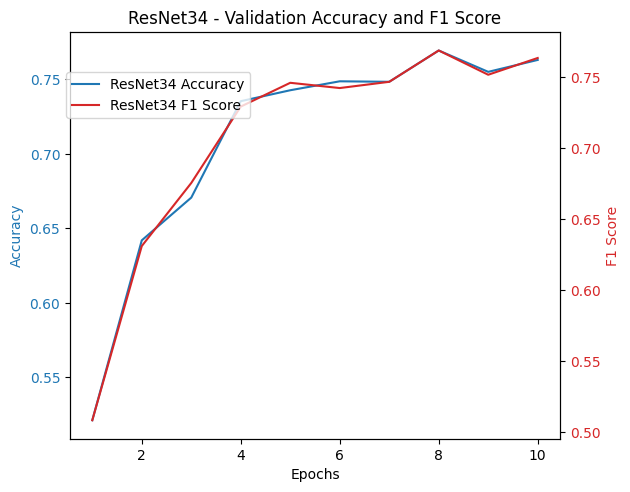

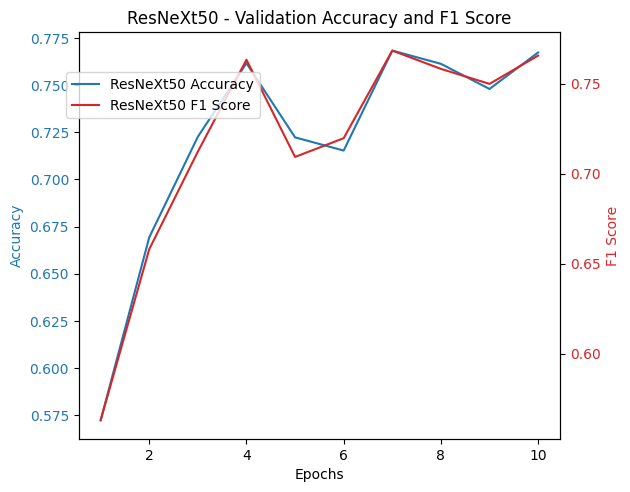

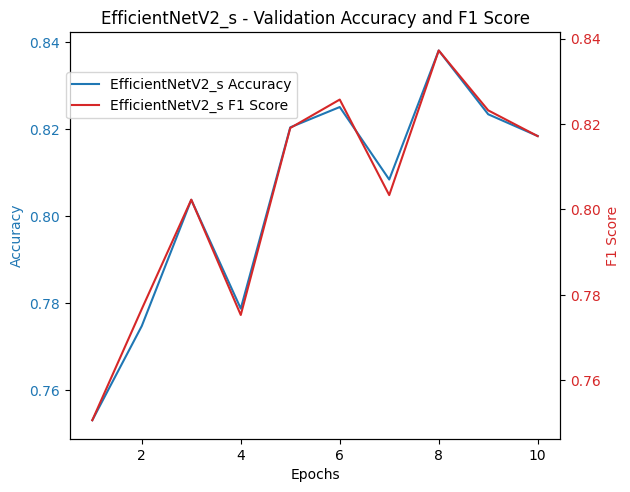

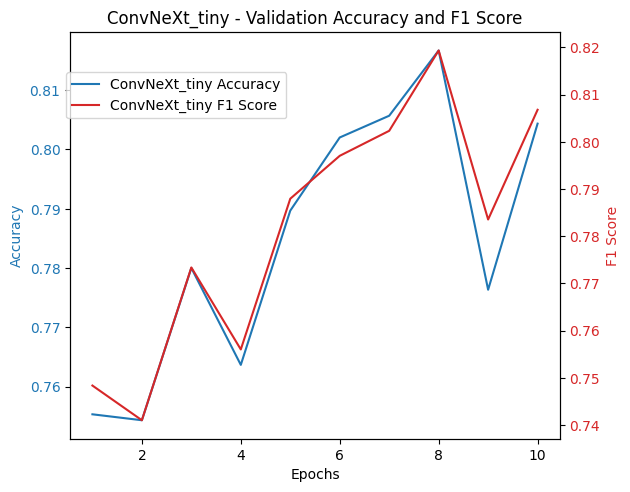

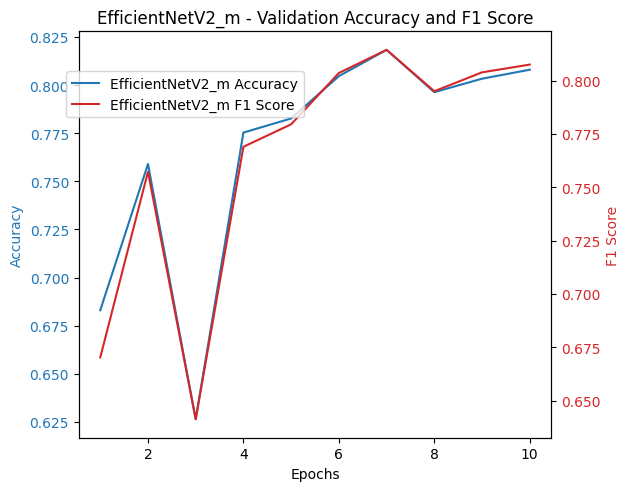

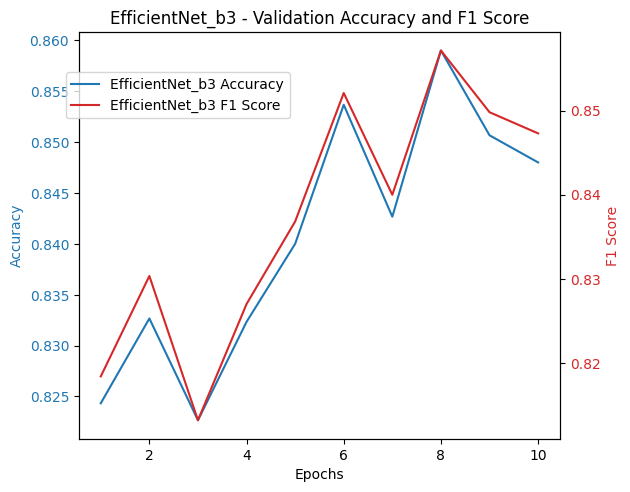

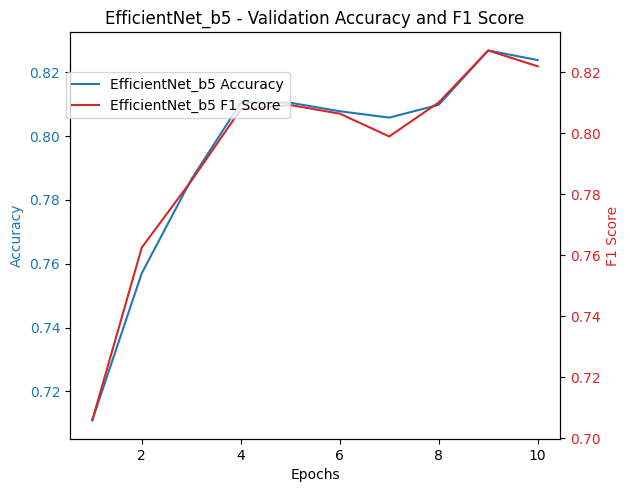

ResNet34 - Training Time: 2810.70 seconds, Number of Parameters: 21300062
ResNeXt50 - Training Time: 1620.06 seconds, Number of Parameters: 23041374
EfficientNetV2_s - Training Time: 1392.46 seconds, Number of Parameters: 20215918
ConvNeXt_tiny - Training Time: 2863.43 seconds, Number of Parameters: 27843198
EfficientNetV2_m - Training Time: 2304.79 seconds, Number of Parameters: 52896786
EfficientNet_b3 - Training Time: 1274.03 seconds, Number of Parameters: 10742342
EfficientNet_b5 - Training Time: 2203.10 seconds, Number of Parameters: 28402254


In [5]:
def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    accuracies = []
    f1_scores = []

    for epoch in range(num_epochs):
        # Training loop
        model.train()
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train

        # Evaluation on the validation set
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        val_loss /= len(val_loader)
        val_accuracy = correct_val / total_val
        val_f1 = f1_score(all_labels, all_preds, average='weighted')

        accuracies.append(val_accuracy)
        f1_scores.append(val_f1)

        print(f'Epoch [{epoch+1}/{num_epochs}] - Training Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {val_f1:.4f}')

    return accuracies, f1_scores

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the number of classes
num_classes = len(dataset.classes)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# List of models to train
model_configs = [
    ("ResNet34", models.resnet34, "fc"),
    ("ResNeXt50", models.resnext50_32x4d, "fc"),
    ("EfficientNetV2_s", models.efficientnet_v2_s, "classifier[1]"),
    ("ConvNeXt_tiny", models.convnext_tiny, "classifier[2]"),
    ("EfficientNetV2_m", models.efficientnet_v2_m, "classifier[1]"),
    ("EfficientNet_b3", models.efficientnet_b3, "classifier[1]"),
    ("EfficientNet_b5", models.efficientnet_b5, "classifier[1]")
]

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model_func, classifier_attr in model_configs:
    model = model_func(pretrained=True)
    classifier_layer = eval(f"model.{classifier_attr}")
    classifier_layer = nn.Linear(classifier_layer.in_features, num_classes)
    exec(f"model.{classifier_attr} = classifier_layer")
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Calculate the number of parameters
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"Training and evaluating {model_name}")
    start_time = time.time()
    accuracies, f1_scores = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10)
    end_time = time.time()
    training_time = end_time - start_time

    results[model_name] = {
        "accuracies": accuracies,
        "f1_scores": f1_scores,
        "training_time": training_time,
        "num_params": num_params
    }

    print(f"{model_name} - Training Time: {training_time:.2f} seconds, Number of Parameters: {num_params}")

# Plotting the results
epochs = range(1, 11)

plt.figure(figsize=(12, 6))

for model_name, metrics in results.items():
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='tab:blue')
    ax1.plot(epochs, metrics["accuracies"], label=f'{model_name} Accuracy', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('F1 Score', color='tab:red')
    ax2.plot(epochs, metrics["f1_scores"], label=f'{model_name} F1 Score', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title(f'{model_name} - Validation Accuracy and F1 Score')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
    plt.show()

# Display training time and number of parameters
for model_name, metrics in results.items():
    print(f"{model_name} - Training Time: {metrics['training_time']:.2f} seconds, Number of Parameters: {metrics['num_params']}")

In [6]:
print(results)

{'ResNet34': {'accuracies': [0.5213333333333333, 0.642, 0.6706666666666666, 0.7353333333333333, 0.7426666666666667, 0.7486666666666667, 0.7483333333333333, 0.7693333333333333, 0.755, 0.763], 'f1_scores': [0.5081295033529909, 0.631034418209872, 0.675525849660733, 0.7294248834904548, 0.7461875395986077, 0.742482268501885, 0.7468793306416618, 0.7689829459947185, 0.751870157636376, 0.763699358130046], 'training_time': 2810.7038106918335, 'num_params': 21300062}, 'ResNeXt50': {'accuracies': [0.5723333333333334, 0.6693333333333333, 0.7226666666666667, 0.7616666666666667, 0.7223333333333334, 0.7153333333333334, 0.7683333333333333, 0.7613333333333333, 0.748, 0.7673333333333333], 'f1_scores': [0.5629588813266339, 0.6580377909059748, 0.7122910453352991, 0.763345304486588, 0.7093089421662162, 0.719731684315688, 0.7684183675718466, 0.7582708254245388, 0.7499190438486797, 0.7656365780858606], 'training_time': 1620.0616106987, 'num_params': 23041374}, 'EfficientNetV2_s': {'accuracies': [0.753, 0.774

In [33]:
import altair as alt
import pandas as pd
alt.renderers.enable('colab')


results = {
    'ResNet34': {'accuracies': [0.5213333333333333, 0.642, 0.6706666666666666, 0.7353333333333333, 0.7426666666666667, 0.7486666666666667, 0.7483333333333333, 0.7693333333333333, 0.755, 0.763], 'f1_scores': [0.5081295033529909, 0.631034418209872, 0.675525849660733, 0.7294248834904548, 0.7461875395986077, 0.742482268501885, 0.7468793306416618, 0.7689829459947185, 0.751870157636376, 0.763699358130046], 'training_time': 2810.7038106918335, 'num_params': 21300062},
    'ResNeXt50': {'accuracies': [0.5723333333333334, 0.6693333333333333, 0.7226666666666667, 0.7616666666666667, 0.7223333333333334, 0.7153333333333334, 0.7683333333333333, 0.7613333333333333, 0.748, 0.7673333333333333], 'f1_scores': [0.5629588813266339, 0.6580377909059748, 0.7122910453352991, 0.763345304486588, 0.7093089421662162, 0.719731684315688, 0.7684183675718466, 0.7582708254245388, 0.7499190438486797, 0.7656365780858606], 'training_time': 1620.0616106987, 'num_params': 23041374},
    'EfficientNetV2_s': {'accuracies': [0.753, 0.7746666666666666, 0.8036666666666666, 0.7786666666666666, 0.8203333333333334, 0.825, 0.8083333333333333, 0.838, 0.8233333333333334, 0.8183333333333334], 'f1_scores': [0.7506080839230885, 0.7766669739899547, 0.8022736579305763, 0.7752619196722441, 0.819052489478621, 0.8257148511217407, 0.8033361043247143, 0.8372094019496465, 0.8231842443006527, 0.8171476424007671], 'training_time': 1392.4612758159637, 'num_params': 20215918},
    'ConvNeXt_tiny': {'accuracies': [0.7553333333333333, 0.7543333333333333, 0.78, 0.7636666666666667, 0.7896666666666666, 0.802, 0.8056666666666666, 0.8166666666666667, 0.7763333333333333, 0.8043333333333333], 'f1_scores': [0.7483682606547979, 0.7410241796239666, 0.7733772371961729, 0.756018024119291, 0.7879340362242587, 0.7970192969009205, 0.8023133843587184, 0.8193266015160069, 0.7835362877257446, 0.8067698673197111], 'training_time': 2863.425936937332, 'num_params': 27843198},
    'EfficientNetV2_m': {'accuracies': [0.683, 0.759, 0.6263333333333333, 0.7753333333333333, 0.7826666666666666, 0.8046666666666666, 0.8183333333333334, 0.7963333333333333, 0.8033333333333333, 0.808], 'f1_scores': [0.670277520946631, 0.7572790837692275, 0.6413093514798639, 0.7689944440135893, 0.7795427358232019, 0.803577344399984, 0.8144420735087179, 0.7950387940895071, 0.8038970880079731, 0.8075271151286207], 'training_time': 2304.7926330566406, 'num_params': 52896786},
    'EfficientNet_b3': {'accuracies': [0.8243333333333334, 0.8326666666666667, 0.8226666666666667, 0.8323333333333334, 0.84, 0.8536666666666667, 0.8426666666666667, 0.859, 0.8506666666666667, 0.848], 'f1_scores': [0.8183829616918221, 0.8303248456348703, 0.8131747612176526, 0.8269887697061891, 0.8368019992733163, 0.8520778277018118, 0.8399803435908745, 0.8571353650825546, 0.8497957927398513, 0.8472812052152597], 'training_time': 1274.0337572097778, 'num_params': 10742342},
    'EfficientNet_b5': {'accuracies': [0.711, 0.757, 0.7863333333333333, 0.8103333333333333, 0.8103333333333333, 0.8076666666666666, 0.8056666666666666, 0.8096666666666666, 0.8266666666666667, 0.8236666666666667], 'f1_scores': [0.7057630213068112, 0.7624198603488529, 0.7842713314987089, 0.8077602841104768, 0.809159649294959, 0.8063334891852098, 0.798851832525373, 0.8100004334255643, 0.8270489294513554, 0.82185869892906], 'training_time': 2203.1013729572296, 'num_params': 28402254}
}

# Convert training time from seconds to minutes for plotting
for model_name, metrics in results.items():
    metrics['training_time'] /= 60

# Prepare the data for Altair
data = []
for model_name, metrics in results.items():
    data.append({
        'Model': model_name,
        'Training Time (minutes)': metrics['training_time'],
        'F1 Score': metrics['f1_scores'][-1],
        'Accuracy': metrics['accuracies'][-1],  # Assuming you have accuracy data
        'Number of Parameters': metrics['num_params']
    })

df = pd.DataFrame(data)

# Ensure the training time is correctly interpreted as a numeric type
df['Training Time (minutes)'] = pd.to_numeric(df['Training Time (minutes)'])

# Create the scatter plot using Altair
scatter_plot = alt.Chart(df).mark_circle().encode(
    x=alt.X('Training Time (minutes):Q', title='Training Time (minutes)', scale=alt.Scale(domain=[10, df['Training Time (minutes)'].max()])),
    y=alt.Y('F1 Score:Q', title='F1 Score', scale=alt.Scale(domain=[0.7, 1.0])),
    size=alt.Size('Number of Parameters:Q', title='Number of Parameters', scale=alt.Scale(type='log', range=[1000, 10000])),  # Increase the range for bigger dots
    color=alt.Color('Model:N', legend=alt.Legend(title='Model Name')),
    tooltip=[
        alt.Tooltip('Model:N', title='Model'),
        alt.Tooltip('Training Time (minutes):Q', title='Training Time (minutes)', format='.2f'),
        alt.Tooltip('F1 Score:Q', title='F1 Score', format='.2f'),
        alt.Tooltip('Accuracy:Q', title='Accuracy', format='.2f'),
        alt.Tooltip('Number of Parameters:Q', title='Number of Parameters', format=',')
    ]
).properties(
    title='Model Performance: F1 Score vs Training Time',
    width=800,
    height=600
)

# Display the plot
scatter_plot

alt.Chart(...)

![Models Performance](https://i.imgur.com/ZpHKEqM.png)
